<a href="https://colab.research.google.com/github/Axel3D2Y/MACHINE-LEARNING-MODELS-USING-SCIKIT-LEARN/blob/main/Analisis%20Telco%20Customer%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import sklearn as sk

In [ ]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


# **Tareas:**


1.  Análisis Exploratorio de Datos (EDA):

  *   Analiza la distribución de las variables y su relación con la variable objetivo Churn.
  *   Encuentra correlaciones y patrones entre las características de los clientes que tienden a hacer churn.
  * Visualiza cómo el tenure, los MonthlyCharges, y otros factores afectan la probabilidad de churn.


2.   Preparación de los datos:

  * Limpieza de datos: Manejo de valores faltantes y outliers.
  * Codificación de variables categóricas (como Contract, InternetService, etc.) en variables numéricas.
  * Estandarización de características numéricas como MonthlyCharges y TotalCharges.

3. Construcción del modelo de predicción:

  * Construir un modelo de clasificación para predecir si un cliente hará churn o no.
  * Usa algoritmos como regresión logística, árboles de decisión, o modelos más avanzados como Random Forest, Gradient Boosting, o XGBoost.
  * Evalúa el rendimiento del modelo usando validación cruzada.


4. Evaluación del modelo:

  * Utiliza métricas como la exactitud (accuracy), AUC-ROC, precisión, recall, y F1-score para evaluar el rendimiento del modelo.
  * Interpreta la importancia de las características en el modelo, identificando cuáles son los factores más relevantes para predecir el churn.

In [ ]:
data=pd.read_csv(path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
data=data[['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','Contract','PaymentMethod','MonthlyCharges','TotalCharges', 'Churn' ]]
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes


In [ ]:
print(data.isnull().sum()) #contando si hay datos nulos en el data frame por columna

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64


In [ ]:
data=data.dropna() #eliminando los datos nulos

# ***Analisis exploratorio de los datos (EDA)***

In [ ]:
# DIVIDIMOS LOS DATOS EN NUMERICOS Y CATEGORICOS
numeric_data=data.select_dtypes(include=['float64','int64'])
string_data=data.select_dtypes(include=['object'])

In [ ]:
#DE LOS DATOS NUMERICOS OBTENEMOS UNA MATRIZ DE CORRELACIONES
correlaciones=numeric_data.corr()
correlaciones

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


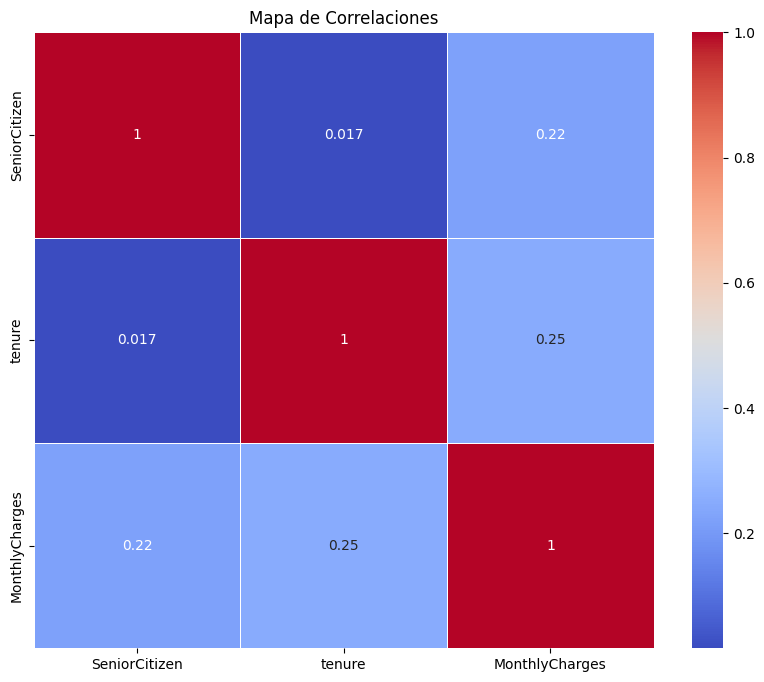

In [ ]:
#GRAFICAMOS LA MATRIZ DE CORRELACIONES EN UN MAPA DE COLOR
plt.figure(figsize=(10,8)) #TAMAÑO DE LA FIGURA
sns.heatmap(correlaciones,annot=True,cmap='coolwarm',linewidths=0.5) #MAPA DE COLOR, DONDE ENTRA LA MATRIZ DE CORRELACIONES
plt.title('Mapa de Correlaciones') #TITULO
plt.show()

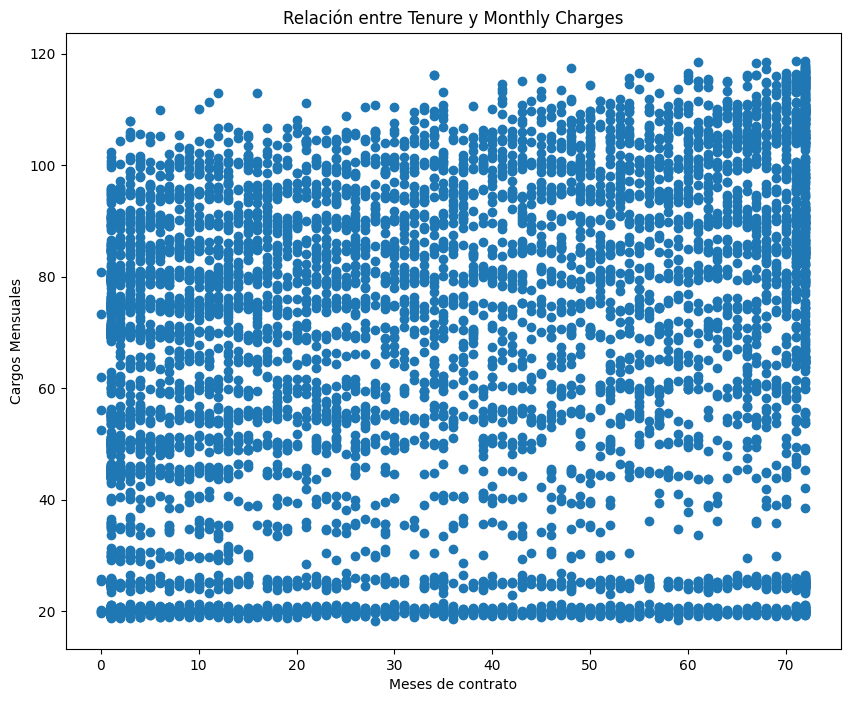

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data['tenure'],data['MonthlyCharges']) # DIAGRAMA DE DISPERSION SCATTERPLOT, DE X= TENURE E Y=MonthlyCharges
plt.xlabel('Meses de contrato')
plt.ylabel('Cargos Mensuales')
plt.title('Relación entre Tenure y Monthly Charges')
plt.show()

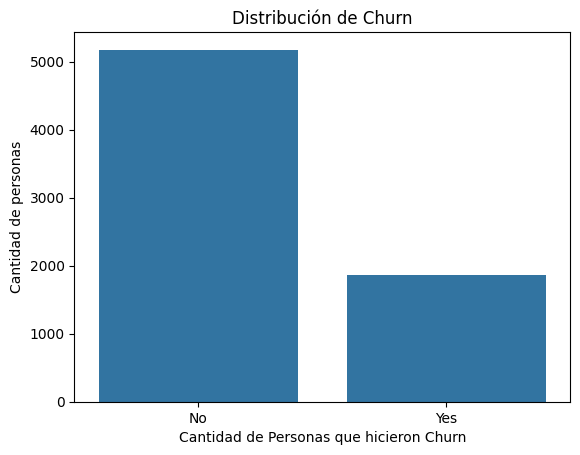

In [ ]:
sns.countplot(x='Churn',data=data) #GRAFICO DE BARRAS DE DESERCIONES DE LA PLATAFORMA
plt.title('Distribución de Churn')
plt.xlabel('Cantidad de Personas que hicieron Churn')
plt.ylabel('Cantidad de personas')
plt.show()

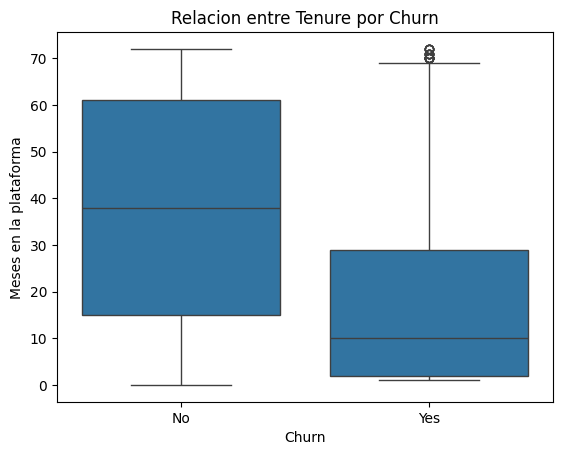

In [ ]:
sns.boxplot(x='Churn',y='tenure', data=data) #GRAFICO DE CAJAS Y BIGOTES DE CHURN X MESES EN LA PLATAFORMA
plt.title('Relacion entre Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses en la plataforma')
plt.show()

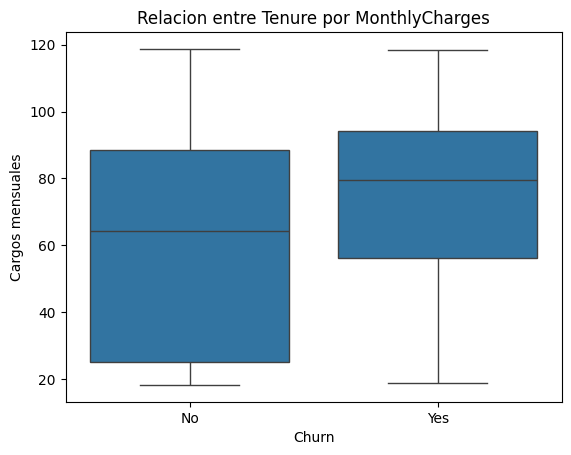

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges', data=data)  #GRAFICO DE CAJAS Y BIGOTES DE CHURN X CARGOS MENSUALES
plt.title('Relacion entre Tenure por MonthlyCharges')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Replace empty strings and spaces with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges']=scaler.fit_transform(data[['TotalCharges']])

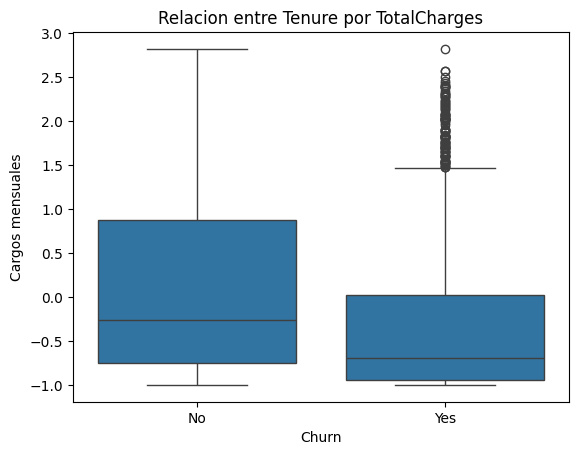

In [ ]:
sns.boxplot(x='Churn',y='TotalCharges', data=data)  #GRAFICO DE CAJAS Y BIGOTES DE CHURN X CARGOS TOTALES
plt.title('Relacion entre Tenure por TotalCharges')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

# ***Preparación de los datos***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=data.drop(columns='customerID')

In [ ]:
#libreria para cambiar las etiquietas de variables categoricas a numericas
from sklearn.preprocessing import LabelEncoder
# para todas las columnas con datos tipo object vamos a transformar sus elementos a tipos numericos
for columnas in data.select_dtypes(include=['object']).columns: #entra en el bucle y corre sobre las columnas con tipo objetos
  if columnas != 'Churn': # selecciona todas las columnas menos  churn
    le=LabelEncoder() #crea un objeto de la clase LabelEncoder
    data[columnas]=le.fit_transform(data[columnas]) #reetiqueta para elementos con distintos elementos

data['Churn'] = data['Churn'].apply(lambda x: 1 if x== 'Yes' else 0) #En la columa Churn, cambia las etiquetas de yes o no por 1 o 0 respectivamente,. usando la funcion lamda que tiene como parametro x: y devuelve 1 o 0

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,29.85,-0.994194,0
1,1,0,0,0,34,1,0,0,1,3,56.95,-0.173740,0
2,1,0,0,0,2,1,0,0,0,3,53.85,-0.959649,1
3,1,0,0,0,45,0,1,0,1,0,42.30,-0.195248,0
4,0,0,0,0,2,1,0,1,0,2,70.70,-0.940457,1


# Clasificacion con RandomForest

In [ ]:
#separar los conjuntos de datos
X=data.drop(columns='Churn')
y=data['Churn']

In [ ]:
#separa los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
#estandarizando los datos de Monthlycharges
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [ ]:
# Modelo de bosque aleatorio
model=RandomForestClassifier(n_estimators=100, random_state=1)

In [ ]:
#entrenar el modelo
model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Guardar las predicciones hechas el random Forest para los datos de test escalados X_test_scaled
Y_pred = model.predict(X_test_scaled)

In [ ]:
# Imprime las calificaciones de la precision del modelo
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1061
           1       0.59      0.50      0.54       348

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.79      1409



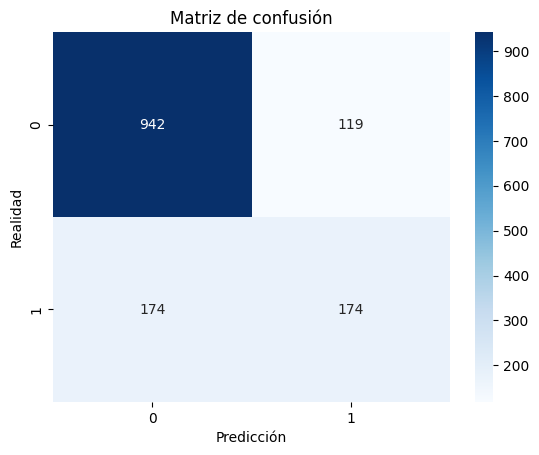

In [ ]:
#MATRIZ DE CONFUSION
confusion_m=confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_m,annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Text(0, 0.5, 'Caracteristicas')

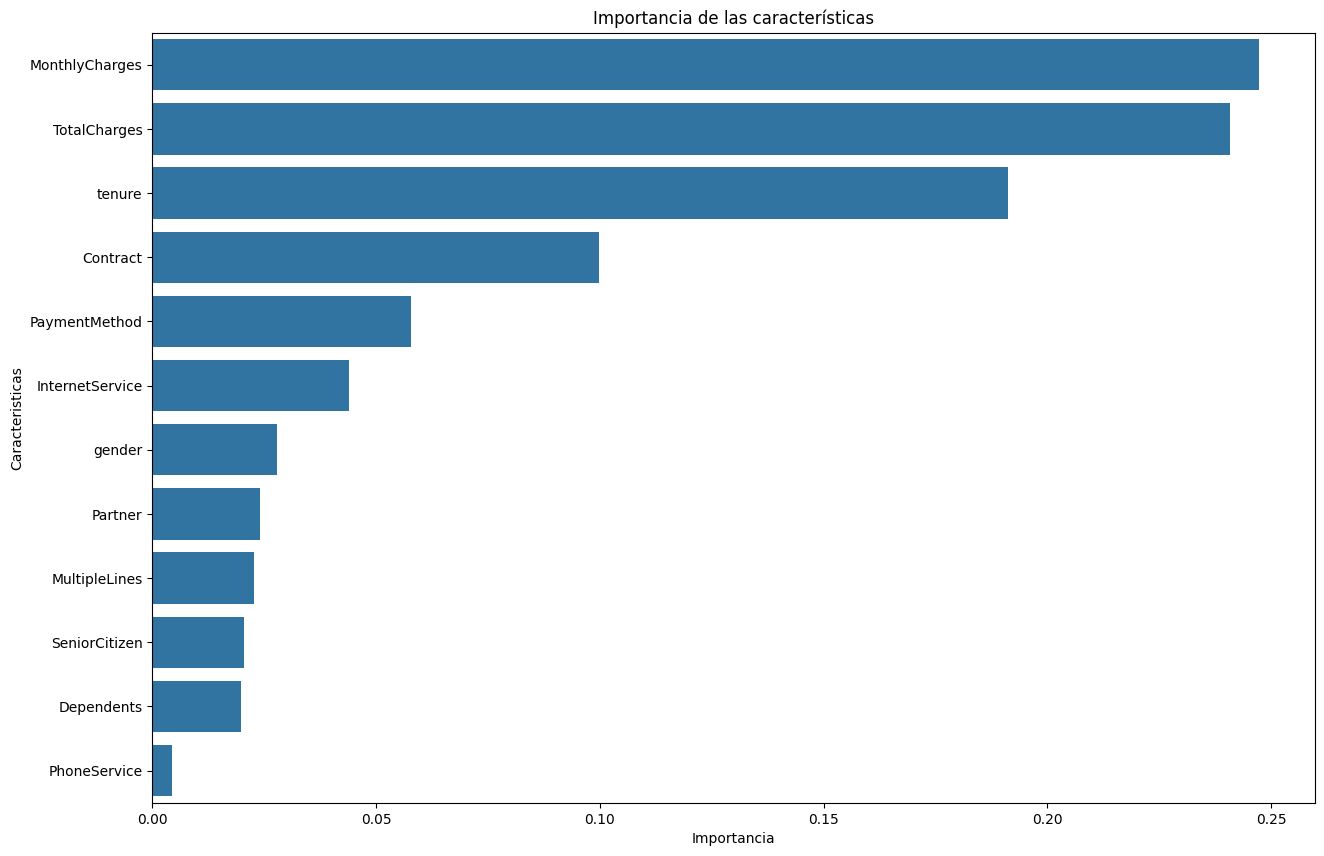

In [ ]:
#IMPORTANCIAAS
importancias=model.feature_importances_
Caracteristicas=X.columns
importancias_df = pd.DataFrame({'Caracteristicas':Caracteristicas,'Importancia':importancias})
importancias_df=importancias_df.sort_values(ascending=False, by ='Importancia')
plt.figure(figsize=(15,10))
sns.barplot(x='Importancia', y='Caracteristicas', data=importancias_df)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')

#podemos notar que podriamos eliminar Phoneservice ya que no tiene mucha relevancia en el modelo

In [ ]:
puntuacion_rf=model.score(X_test_scaled, Y_test)
print(puntuacion_rf)

0.7920511000709723


# **XGBOOST**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X=data.drop(columns='Churn')
y=data['Churn']

In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape

((5634, 12), (1409, 12))

In [ ]:
X_val, X_test, Y_val, Y_test =train_test_split(X_test,Y_test, test_size=0.50, random_state=1)
X_train.shape, X_test.shape, X_val.shape

((5634, 12), (705, 12), (704, 12))

In [ ]:
xgb=xgboost.XGBClassifier(
    eval_metric = 'logloss')

In [ ]:
parameters={
     'nthreads': [1],
     'objective': ['binary:logistic'],
     'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 5, 10,20,30],
     'early_stopping_rounds': [10]
}



In [ ]:
cls_gs = GridSearchCV(xgb , parameters , cv=5 ,scoring='accuracy',n_jobs=-1)

In [ ]:
cls_gs.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

[0]	validation_0-logloss:0.55128
[1]	validation_0-logloss:0.54128
[2]	validation_0-logloss:0.53217
[3]	validation_0-logloss:0.52383
[4]	validation_0-logloss:0.51646
[5]	validation_0-logloss:0.50963
[6]	validation_0-logloss:0.50343
[7]	validation_0-logloss:0.49788
[8]	validation_0-logloss:0.49243
[9]	validation_0-logloss:0.48759
[10]	validation_0-logloss:0.48296
[11]	validation_0-logloss:0.47892
[12]	validation_0-logloss:0.47497
[13]	validation_0-logloss:0.47139
[14]	validation_0-logloss:0.46800
[15]	validation_0-logloss:0.46513
[16]	validation_0-logloss:0.46225
[17]	validation_0-logloss:0.45982
[18]	validation_0-logloss:0.45722
[19]	validation_0-logloss:0.45516
[20]	validation_0-logloss:0.45292
[21]	validation_0-logloss:0.45113
[22]	validation_0-logloss:0.44925
[23]	validation_0-logloss:0.44752
[24]	validation_0-logloss:0.44587
[25]	validation_0-logloss:0.44427
[26]	validation_0-logloss:0.44293
[27]	validation_0-logloss:0.44184
[28]	validation_0-logloss:0.44057
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:36:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "nthreads" } are not used.

  warnings.warn(smsg, UserWarning)


[33]	validation_0-logloss:0.43498
[34]	validation_0-logloss:0.43382
[35]	validation_0-logloss:0.43308
[36]	validation_0-logloss:0.43227
[37]	validation_0-logloss:0.43164
[38]	validation_0-logloss:0.43101
[39]	validation_0-logloss:0.43049
[40]	validation_0-logloss:0.42969
[41]	validation_0-logloss:0.42908
[42]	validation_0-logloss:0.42858
[43]	validation_0-logloss:0.42799
[44]	validation_0-logloss:0.42743
[45]	validation_0-logloss:0.42670
[46]	validation_0-logloss:0.42622
[47]	validation_0-logloss:0.42591
[48]	validation_0-logloss:0.42539
[49]	validation_0-logloss:0.42479
[50]	validation_0-logloss:0.42429
[51]	validation_0-logloss:0.42394
[52]	validation_0-logloss:0.42356
[53]	validation_0-logloss:0.42300
[54]	validation_0-logloss:0.42256
[55]	validation_0-logloss:0.42247
[56]	validation_0-logloss:0.42220
[57]	validation_0-logloss:0.42148
[58]	validation_0-logloss:0.42102
[59]	validation_0-logloss:0.42078
[60]	validation_0-logloss:0.42045
[61]	validation_0-logloss:0.42017
[62]	validatio

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [10],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10, 20, 30],
                         'n_estimators': [100, 200, 300], 'nthreads': [1],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [ ]:
print(cls_gs.best_params_)
print( cls_gs.best_score_)

{'early_stopping_rounds': 10, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'nthreads': 1, 'objective': 'binary:logistic'}
0.7990731299083846


In [ ]:
print( cls_gs.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, nthreads=1, num_parallel_tree=None, ...)


In [ ]:
best_estimator = cls_gs.best_estimator_
y_pred_val=best_estimator.predict(X_val)
comp=pd.DataFrame({'Real': Y_val,
                   'Prediccion': y_pred_val})
print(comp)


      Real  Prediccion
1321     0           0
3595     1           1
28       0           0
4291     0           0
2582     0           1
...    ...         ...
314      1           1
675      0           0
3336     0           0
2354     0           0
5851     0           0

[704 rows x 2 columns]


In [ ]:
accuracy=accuracy_score(Y_val, y_pred_val)
print(accuracy)

0.8181818181818182


# ***CLASIFICACION*:**











**SUPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [ ]:
X=data.drop(columns='Churn')
y=data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((5634, 12), (1409, 12))

In [ ]:
svm_clf = SVC(C=1.0,kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#Presicion en datos de entrenamiento
y_predic_train=svm_clf.predict(X_train)
precision_svm=accuracy_score(y_train, y_predic_train)
print(precision_svm)

0.788604898828541


In [ ]:
#Presicion en datos de test
y_predic_test=svm_clf.predict(X_test)
precision_svm_test=accuracy_score(y_test, y_predic_test)
print(precision_svm_test)

0.7927608232789212


In [ ]:
print("Informe de clasificación:")
print(classification_report(y_test,  y_predic_test))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1061
           1       0.59      0.54      0.56       348

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



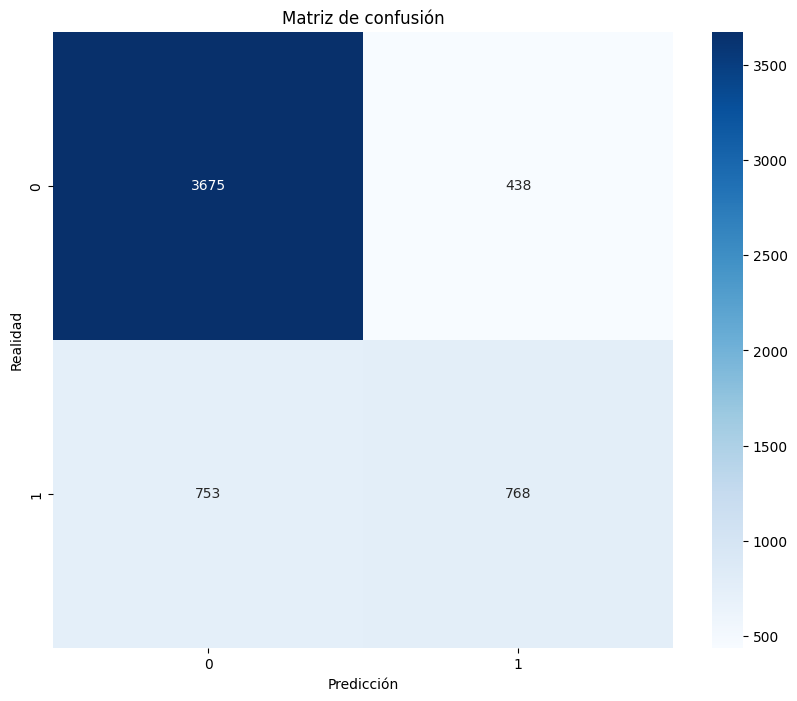

In [ ]:
matrix_confusion=confusion_matrix(y_train, y_predic_train)
plt.figure(figsize=(10,8))
sns.heatmap(matrix_confusion, annot=True,  fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# **Conclusiones**

Podemos notar que de los 3 modelos de clasifiacion usados, la mejor presicion para el entrenamiento de clasificacion de los datos, ronda en un 78-80 % de presicion al clasificar los datos, por lo que podemos asegurar que la clasificacion necestita mejorar un poco, ademas podemos predecir con un 80% de seguridad si una persona va a hacer churn o no, en el primer caso necesitariomos pasarle los correspondientes parametros en la funcion ***svm_clf_prefic(['Vector de caracteristicas'])***